# EDGE DETECTION
To detect edges or lines we utilize image intensity. Edges correspond to extremas of derivative of a intensity function.

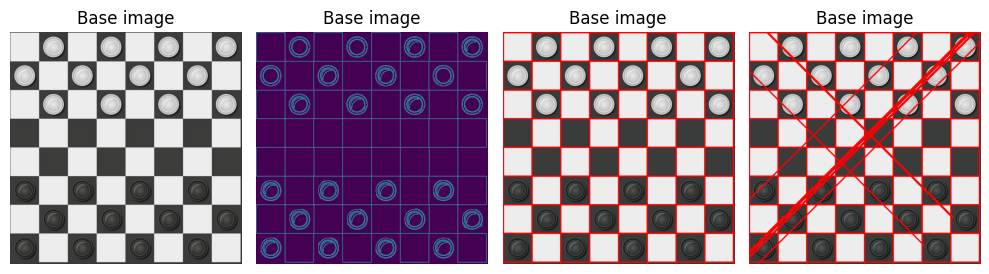

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread("pics/checkers.png")
img_lines = img.copy()
img_lines2 = img.copy()
b,g,r = cv.split(img)
img = cv.merge([r,g,b])

gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
edges = cv.Canny(gray, 20, 200)

lines = cv.HoughLines(edges, 1, np.pi / 180, 200)

for i in range(len(lines)):
    r = lines[i][0][0]
    theta = lines[i][0][1]
    
    x0 = r * np.cos(theta)
    y0 = r * np.sin(theta)
    
    pt1 = (int(x0 + 1000 * (-np.sin(theta))), int(y0 + 1000 * np.cos(theta)))
    pt2 = (int(x0 - 1000 * (-np.sin(theta))), int(y0 - 1000 * np.cos(theta)))
    
    cv.line(img_lines, pt1, pt2, (255, 0, 0), 3)
    
lines2 = cv.HoughLines(edges, 1, np.pi / 180, 150)

for i in range(len(lines2)):
    r = lines2[i][0][0]
    theta = lines2[i][0][1]
    
    x0 = r * np.cos(theta)
    y0 = r * np.sin(theta)
    
    pt1 = (int(x0 + 1000 * (-np.sin(theta))), int(y0 + 1000 * np.cos(theta)))
    pt2 = (int(x0 - 1000 * (-np.sin(theta))), int(y0 - 1000 * np.cos(theta)))
    
    cv.line(img_lines2, pt1, pt2, (255, 0, 0), 3)


fig, axes = plt.subplots(1, 4, figsize=(10, 5)) 

axes[0].imshow(img)
axes[0].axis('off')
axes[0].set_title('Base image')

axes[1].imshow(edges)
axes[1].axis('off')
axes[1].set_title('Base image')

axes[2].imshow(img_lines)
axes[2].axis('off')
axes[2].set_title('Base image')

axes[3].imshow(img_lines2)
axes[3].axis('off')
axes[3].set_title('Base image')

plt.tight_layout()
plt.show()



## HOUGH LINES & CANNY
cv.Canny(gray, lower_threshold, higher_threshold)

- lower_threshold - minimum gradient magnitude for a pixel to be considered as edge, if the gradient magnitude is equal or larger than the lower threshold value the edge is considered as a weak or strong
- higher_threshold - maximum gradient magnitude that a pixel can have to be considered as a strong edge, if the gradient magnitude is equal or larger than the higher threshold value the edge is considered as strong


cv.HoughLines(edges, rho, theta, threshold)

- rho - resolution in pixels, typically it is set to 1 so each pixel corresponds to a unit distance in the accumulator space
- theta - resolution of the accumulator in terms of angles, its typically set to np.pi / 180 as this value in radians corresponds to 1 degree
- threshold - the minimum number of intersections/votes required for a line to be considered

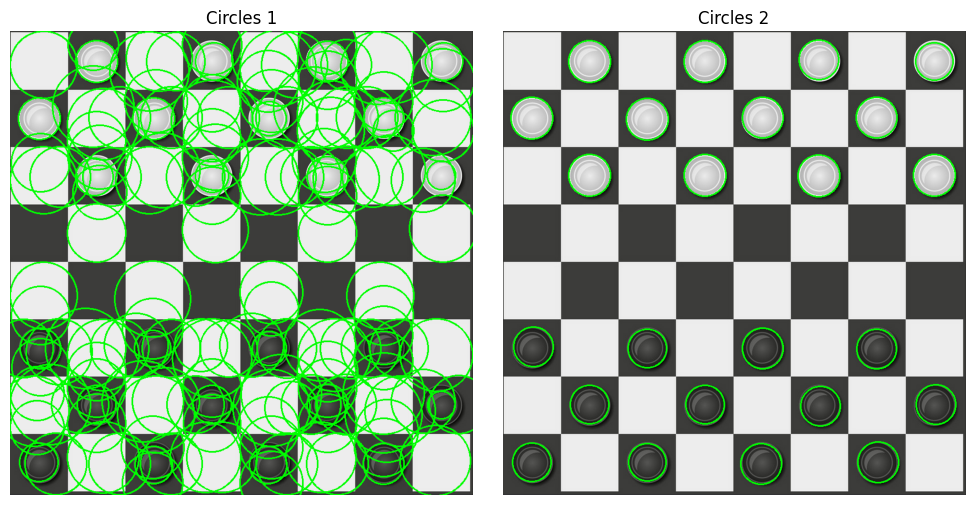

In [41]:
circles1 = cv.HoughCircles(edges, cv.HOUGH_GRADIENT, dp=1.2, minDist=30, param1=50, param2=30, minRadius=25, maxRadius=75)
circles2 = cv.HoughCircles(edges, cv.HOUGH_GRADIENT, dp=1.5, minDist=30, param1=140, param2=60, minRadius=30, maxRadius=50)

img_circles1 = img.copy()
img_circles2 = img.copy()

for i in range(len(circles1[0])):
    cv.circle(img_circles1, (round(circles1[0][i][0]), round(circles1[0][i][1])), round(circles1[0][i][2]), (0,255,0), 2)
    
for i in range(len(circles2[0])):
    cv.circle(img_circles2, (round(circles2[0][i][0]), round(circles2[0][i][1])), round(circles2[0][i][2]), (0,255,0), 2)

# Show the result
fig, axes = plt.subplots(1, 2, figsize=(10, 5)) 

axes[0].imshow(img_circles1)
axes[0].axis('off')
axes[0].set_title('Circles 1')

axes[1].imshow(img_circles2)
axes[1].axis('off')
axes[1].set_title('Circles 2')

plt.tight_layout()
plt.show()


## HOUGH CIRCLES
- dp - resolution of the accumulator array, when dp = 1 the resolution is equal to the image and if dp = 2 the resolution is half of the image. Higher values make the algorithm faster, but can reduce accuracity.
- minDist - minimum distance between circle centers
- param1 - Canny Edge Detector Upper Threshold, look up for Canny parameters explanations
- param2 - accumulator threshold for circle centers, threshold for the votes required for a circle to be considered as such
- minRadius and maxRadius - self-explanatory
